# Regression and Classification

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

mpl.rcParams['axes.labelsize'] = 15

## Simple Regression
In simple linear regression, we have $Y = \beta_0 + \beta_1 X$, where $X$ is an explanatory variable and $Y$ is a response variable. In class, we derived the **least squares** estimates for $\beta_0$ and $\beta_1$ by solving the following minimization problem:
$$
b_0^*, b_1^* = \underset{b_0, b_1}{\arg\,\min} \frac{1}{n}\sum_{i=1}^n (y_i - (b_0 + b_1x_i))^2
$$


In [28]:
def generate_random_data_1d(n=1000, i_slope=None, i_bias=None, verbose=False):
    """
    generate a random dataset for simple regression
    
    Parameters:
    ----------------
    n: int, number of observations to generate
    i_slope, i_bias: float, the slope and bias of regression function
    verbose: boolean, if `True`, it prints messages
    
    Returns:
    (X, Y): a dataset, both X and Y are 1D numpy arrays
    """

    slope = np.random.rand() * 3 if i_slope is None else i_slope
    bias = np.random.rand() * 3 if i_slope is None else i_bias
        
    noise = np.random.randn(n) * 2.0
    x = np.linspace(0, 10, n)
    y = slope * x + bias + noise
    
    if verbose:
        print("Generated {0:d} points from Y={1:.2f}X + {2:.2f} + noise".format(n, slope, bias))
    
    return x, y

In [68]:
# generate a dataset  
n_obs = 50
X, Y = generate_random_data_1d(n_obs)

estimate (slope, bias) =  (34.5538408793831, -0.9500493537579907)


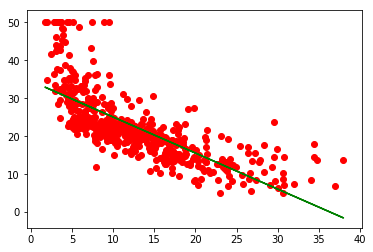

In [221]:
def solve_simple_regression(X, Y):
    """
    This function solves a simple regression problem and returns
    the estimated slope and bias.
    
    Parameters:
    -----------------
    X, Y: 1d numpy array, input data
    
    Returns:
    -----------------
    b0, b1: float, estimated bias and slope
    """
    

    #Calculating the mean of X
    xmean=np.mean(X)    
    #Calculating the mean of Y
    
    ymean=np.mean(Y)
    
    length=len(X)

    #Calculating the numerator of b1
    b1num=0
    for i in range(length):
        b1num=b1num+((X[i]-xmean)*(Y[i]-ymean))
    #Calculating the denominator of b1
    b1denom=0
    for i in range(length):
        b1denom = b1denom + ((X[i]-xmean)*(X[i]-xmean))
    #Calculating b1
    b1=b1num/b1denom
    #Calculating b0
    b0 = ymean-(b1*xmean)
    return b0, b1

b0, b1 = solve_simple_regression(X, Y)    
print("estimate (slope, bias) = ", (b0, b1))


# Maximum value of data to visualise the line
# x_max = np.max(X) + 1
# x_min = np.min(X) - 1
# x = np.linspace(x_min, x_max, 50)
# y_pred = b0 + b1 *x_max
# x=[0,x_max]
# y=[b0,y_pred]
y_pred=[]
for i in range(len(X)):
    y_pred.append(b0 + b1 *X[i])
#plotting line 
plt.plot(X,y_pred , color='green', label='Linear Regression')

plt.scatter(X, Y, color='red', label='Data Point')


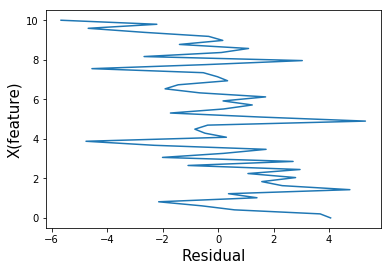

In [96]:
residual=(Y-y)
plt.xlabel('Residual')
plt.ylabel('X(feature)')
plt.plot(residual,X)

In [125]:
# Generate samples
true_slope = 1.1
true_bias = 2.2
listbo=[]
listb1=[]

for i in range(0,5000):
    X,Y=generate_random_data_1d(n=50, i_slope=true_slope, i_bias=true_bias)
    b0, b1 = solve_simple_regression(X, Y) 
    listbo.append(b0)
    listb1.append(b1)





In [1]:
fig, axs = plt.subplots(1, 2)


# Number of bins
axs[0].hist(listbo, bins=50,density=True,color='orange')
axs[0].set_xlabel('bo*')
axs[1].hist(listb1, bins=50,density=True)
axs[1].set_xlabel('b1*')

NameError: name 'plt' is not defined

## Polynomial Regression
Implementing Basis expansion




In [137]:
from sklearn.datasets import load_boston

# load the dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Y'] = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


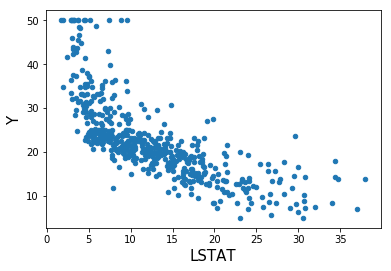

In [139]:
df.plot.scatter(x='LSTAT', y='Y')

In [259]:
def mse(y, y_hat):
    """
    This functions computes the MSE.
    
    Parameters:
    ------------------
    y: 1d array, response values
    y_hat: 1d array, predicted (or fitted) values
    
    Returns:
    -----------------
    error: float, a scalar
    """
    

    error=0
    for i in range(len(y)):
        error+=(y[i]-y_hat[i])*(y[i]-y_hat[i])
    error=error/y.shape[0]
    return error
    

In [261]:
y=df['Y']
x=df['LSTAT']

b0, b1 = solve_simple_regression(x, y)
print(b0)
print(b1)
y_pred=[]
for i in range(len(x)):
    val=b0+(b1*x[i])
    y_pred.append(val)

34.553840879383124
-0.9500493537579905


In [262]:
e = mse(y,y_pred)
e

38.48296722989415

The linear model does not work here. This is because we get a very high error value and the plot above gives us an intution that a linear model may not be a good fit

In [240]:
def expand_basis(X, k):
    """
    Expand the basis
    
    Parameters:
    ----------------    
    X: 1d array corresponding to a feature
    k: int, degree of polynomial
    
    Returns:
    ----------------
    X_ex: 2d array corresponding to the transformed data,
          each row and column correspond to an observation and a feature,
          respectively.          
    """
    
    X_tran=[]
    if X.ndim > 1:
        raise ValueError('This function expects x to be a 1-dimensional array')
    for i in range(0,k+1):
        temp=[]
        for j in range(len(X)):
            temp.append(X[j]**i)
        X_tran.append(temp)
    X_tran=np.array(X_tran)
    #---------------------------#
    #    Your code goes here    #
    #---------------------------#
    X_tran=pd.DataFrame(X_tran)
    X_tran=X_tran.T
    return X_tran

In [241]:
X = df['LSTAT'].values
Y = df['Y'].values
# transform your data
X_new_2d = expand_basis(X, 2)   
X_new_2d.head()

,0,1,2
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436
4,1.0,5.33,28.4089


The R^2 score =  0.6407168971636612
The mse  =  30.33052007585373


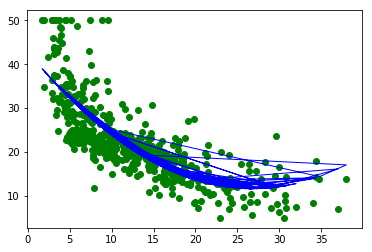

In [258]:
from sklearn.linear_model import LinearRegression

degree = 2

#-------------------------------------#
#     Your code goes here             #
#-------------------------------------#
linreg=LinearRegression().fit(X_new_2d,Y)
y_pred=linreg.predict(X_new_2d)
score=linreg.score(X_new_2d,Y)
print("The R^2 score = ",score)

mse=0
for i in range(len(y_pred)):
    mse+=(Y[i]-y_pred[i])**2
mse=mse/Y.shape[0]
print("The mse  = ",mse)
X_new_2d=np.array(X_new_2d)
plt.scatter(X,Y,color='g')
plt.plot(X, linreg.predict(X_new_2d),color='blue',linewidth=1)


In [299]:
X = df['LSTAT'].values
Y = df['Y'].values
degree=[]
mserror=[]
rsquare=[]
temp=0
e=0
for i in range(1,11):
    x_new=expand_basis(X, i)
    linreg.fit(x_new,Y)
    y_pred=linreg.predict(x_new)
    e=linreg.score(x_new,Y)
    rsquare.append(e)
    for j in range(len(Y)):
        temp+=(y_pred[j]-Y[j])**2
    temp=temp/Y.shape[0]
    mserror.append(temp)
    degree.append(i)


Text(0, 0.5, 'degree')

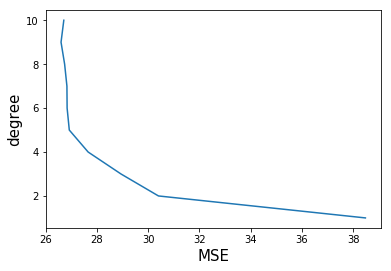

In [306]:
plt.plot(mserror,degree)
plt.xlabel('MSE')
plt.ylabel('degree')

Text(0, 0.5, 'degree')

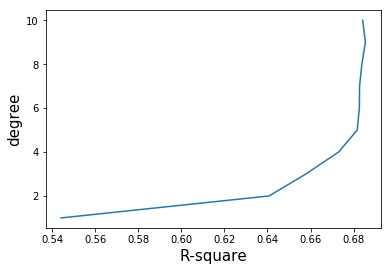

In [307]:
plt.plot(rsquare,degree)
plt.xlabel('R-square')
plt.ylabel('degree')

We observe that the R-square is just normalized version of the Mean Squared error

K value = 2 is best for this example

In [312]:
def compute_gradient(beta):
    """
    Computes the gradient of the objective function at the given parameter values.
    
    Parameters:
    --------------------
    beta: 1d array, parameter vector (i.e., linear regression coefficients)
    
    
    Returns:
    --------------------
    grad: 1d array, gradient vector
    """
    total=0
    tempsum=0
    s=0

    
    for i in range(len(y)):
        for j in range(len(beta)):
                       tempsum+=beta[j]*x[i][j]
        total+=y[i]-tempsum
    for i in range(len(beta)):
                       s+=x[i][j]
    sum=0
    sum+=total*(s)
    sum=(2/len(y))*(-1)